In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#hide
from fastbook import *

# Image Classification

## From Dogs and Cats to Pet Breeds

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

# Importando fastAI vision
# URLs.PETS	Um atalho da FastAI para o link oficial do Oxford-IIIT Pet Dataset
# untar_data()	Baixa o dataset (se ainda não tiver) e descompacta ele numa pasta local
# path	Variável que agora guarda o caminho da pasta onde o dataset foi descompactado

In [4]:
#hide
Path.BASE_PATH = path

# "Considere a pasta path como a base para mostrar todos os caminhos relativos daqui pra frente."

In [7]:
path.ls()

# Mostra o que existe dentro do caminho

(#2) [Path('images'),Path('annotations')]

In [8]:
(path/"images").ls()

# Mostra o que existe dentro da pasta "images"

(#7393) [Path('images/beagle_115.jpg'),Path('images/boxer_18.jpg'),Path('images/Maine_Coon_157.jpg'),Path('images/scottish_terrier_28.jpg'),Path('images/english_setter_6.jpg'),Path('images/american_pit_bull_terrier_79.jpg'),Path('images/boxer_128.jpg'),Path('images/Persian_265.jpg'),Path('images/Maine_Coon_182.jpg'),Path('images/keeshond_89.jpg'),Path('images/chihuahua_82.jpg'),Path('images/basset_hound_5.jpg'),Path('images/english_cocker_spaniel_144.jpg'),Path('images/scottish_terrier_108.jpg'),Path('images/British_Shorthair_116.jpg'),Path('images/boxer_10.jpg'),Path('images/basset_hound_194.jpg'),Path('images/beagle_85.jpg'),Path('images/japanese_chin_87.jpg'),Path('images/pug_40.jpg')...]

In [9]:
fname = (path/"images").ls()[0]

# Define com fname nome do primeiro arquivo da pasta images

In [10]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

# Usa regex para obter, no nome do arquivo, somente o que esta antes de _número

['beagle']

In [11]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

# blocks = (ImageBlock, CategoryBlock): Define o tipo de input e output: imagens como entrada e categorias (classes) como saída (ex: tipos de raças de pets).
# get_items = get_image_files	Diz ao FastAI como encontrar os arquivos: procura por arquivos de imagem dentro da pasta fornecida (path/"images").
# splitter = RandomSplitter(seed=42)	Faz uma divisão aleatória entre treino e validação, com o seed 42 (pra garantir que a divisão seja reproduzível).
# get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name')	Essa é a parte que extrai o rótulo (label) de cada imagem:
    # Pega o nome do arquivo (ex: "Siberian_123.jpg"),
    #Usa uma expressão regular para capturar tudo antes do underscore ("Siberian"),
    #Assim, cada imagem vira uma categoria (raça).
# item_tfms = Resize(460): Antes de formar o batch, redimensiona cada imagem para 460×460, mantendo proporção (com crop ou padding se necessário).
# batch_tfms = aug_transforms(size=224, min_scale=0.75): Durante a formação dos batches, aplica data augmentation: resize final para 224×224 com augmentations como flips, brightness, etc.

#dls = pets.dataloaders(path/"images"): Gera os DataLoaders reais (treino + validação) a partir da pasta de imagens.

### Checking and Debugging a DataBlock

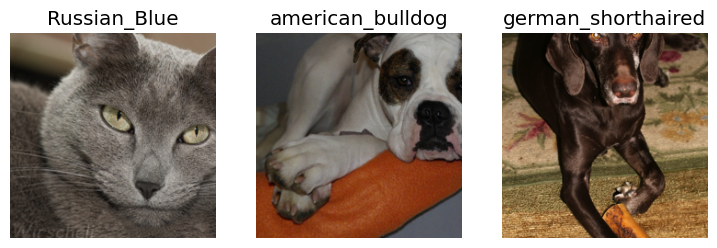

In [12]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

# pets1 = DataBlock(...)	Cria o DataBlock com as configurações que você já conhece: entrada = imagem, saída = categoria, rótulo vindo do nome do arquivo, etc.

# .summary(path/"images")	Executa um diagnóstico do DataBlock, simulando o processo de criação dos DataLoaders e mostrando detalhes do fluxo de dados em cada etapa

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_43.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_43.jpg
    applying partial gives
      basset_hound
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(14)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(14))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte

RuntimeError: Error when trying to collate the data into batches with fa_collate, at least two tensors in the batch are not the same size.

Mismatch found on axis 0 of the batch and is of type `TensorImage`:
	Item at index 0 has shape: torch.Size([3, 500, 333])
	Item at index 1 has shape: torch.Size([3, 375, 500])

Please include a transform in `after_item` that ensures all data of type TensorImage is the same size

In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

# Treinando o modelo

# vision_learner(dls, resnet34, metrics=error_rate)	Cria um Learner FastAI pronto para tarefas de classificação de imagens. Ele vai:
    # Usar os DataLoaders (dls) que você preparou com o pets1
    # Usar como backbone o modelo ResNet34, que é maior e mais profundo que a ResNet18 (melhor pra datasets mais complexos)
    # Monitorar o error_rate como métrica (erro = 1 - acurácia)

# learn.fine_tune(2)	Treina o modelo: 1 época só treinando a cabeça (head) e depois mais 1 época destravando e treinando toda a rede (fine-tuning completo).

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 187MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.508665,0.387959,0.122463,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.512730,0.333855,0.110284,00:48
1,0.317498,0.228229,0.074425,00:51


## Cross-Entropy Loss

### Viewing Activations and Labels

In [15]:
x,y = dls.one_batch()

# dls.one_batch()	Pega um batch (lote) de treino do DataLoader

# x, y: 	
# Faz o unpack: x recebe os inputs (imagens do batch) 
# y recebe os rótulos (classes de cada imagem)

In [16]:
y

# Mostra os rotulos das imagens de um batche

TensorCategory([27,  9,  8,  6,  2, 27,  9, 28, 26, 18, 19, 17, 12,  3, 21,  5, 20, 29, 22, 26, 15, 33,  8, 22, 25, 24, 11,  4, 21, 24, 21,  6, 22, 29,  7, 35, 16, 16,  1,  3, 25, 22,  7,  9, 29, 26,
                26, 30,  0, 29, 16,  1,  0, 18, 18, 36, 26, 18, 36, 35, 18, 28, 11,  9], device='cuda:0')

In [17]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

# learn.get_preds(dl=[(x, y)])
    # O método get_preds normalmente espera um DataLoader,
    # Mas o FastAI é esperto: você pode passar uma lista de tuplas como um mini-dataloader temporário.
    # Aqui, você está dizendo: "Roda o modelo learn usando esse batch manual que eu passei (x, y), e me devolve as predições."

# get_preds sempre retorna 2 coisas:
    # preds	As predições do modelo (probabilidades por classe, no caso de classificação)
    #_	Os rótulos verdadeiros (targets) – mas você já tem o y, então pode ignorar

# preds[0]
# Está pegando a predição da primeira imagem do batch.
# Se for uma classificação multi-classe (como o caso das raças dos pets), preds[0] será um vetor de probabilidades para cada classe.

tensor([6.6234e-11, 4.1313e-10, 5.8686e-09, 7.1671e-10, 8.1402e-09, 2.3078e-09, 3.1532e-08, 3.0131e-07, 1.5097e-10, 2.2806e-08, 1.3043e-09, 1.5612e-10, 1.1141e-10, 9.6151e-10, 1.1260e-07, 3.3792e-09,
        4.6296e-10, 9.8942e-10, 1.0926e-06, 7.0241e-10, 1.6426e-08, 3.4912e-06, 3.6358e-07, 2.9160e-07, 3.6799e-08, 3.2316e-06, 4.8758e-09, 9.9999e-01, 1.4805e-07, 1.3271e-09, 2.8708e-08, 2.0894e-08,
        2.8972e-08, 4.7071e-09, 5.9302e-10, 8.6592e-08, 5.1601e-09])

In [18]:
len(preds[0]),preds[0].sum()

# Mostrando que é um vetor com as predições para cada classe, que somam 1. 

(37, tensor(1.0000))

### Softmax

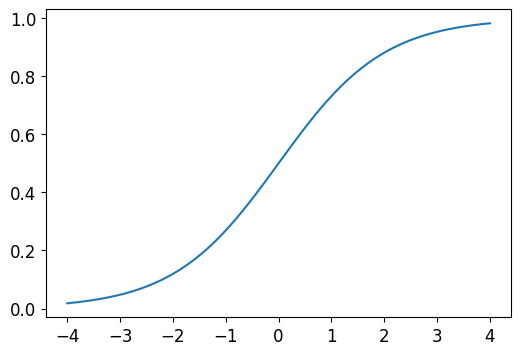

In [19]:
plot_function(torch.sigmoid, min=-4,max=4)

In [20]:
#hide
torch.random.manual_seed(42);

# Isso define a semente ("seed") para o gerador de números aleatórios do PyTorch.
# A partir de agora, todas as operações aleatórias (ex: inicialização de pesos, shuffle de batches, transformações aleatórias nas imagens) terão sempre o mesmo resultado em execuções futuras, desde que o resto do ambiente também seja igual.

# O número 42 é só uma escolha comum na ciência de dados (piada com o livro "O Guia do Mochileiro das Galáxias", onde 42 é "a resposta para a vida, o universo e tudo mais" 😂).
# Você poderia usar qualquer número.

# Pra conseguir comparar resultados de diferentes runs,
# Pra garantir que o split treino/validação não mude de uma execução pra outra,
# Pra fins de debug, publicação de artigos ou reprodutibilidade de experimentos.

In [21]:
acts = torch.randn((6,2))*2
acts

# Cria uma matriz de logits aleatórios, com 6 exemplos e 2 classes. Multiplicado por 2 só pra deixar os valores mais espalhados.

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [22]:
acts.sigmoid()

# 👉 Aplica a sigmoid individualmente a cada elemento da matriz.
# 👉 Cada número vira um valor entre 0 e 1.

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [23]:
(acts[:,0]-acts[:,1]).sigmoid()

# Diferença entre as duas colunas + sigmoid 

# Aqui você está simulando o que o PyTorch faz internamente com BCEWithLogitsLoss em classificação binária com 2 logits.
# Ele calcula:
    # Probabilidade da classe 1 ≈ sigmoid(logit1 - logit2)
    # Isso representa a probabilidade de uma das classes em comparação à outra, típico em binary classification com dois logits.

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [24]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

# Aqui sim você está fazendo a conversão correta de logits para probabilidades por classe (multi-class softmax).
# Softmax faz:
    # Exponencia os logits
    # Normaliza pra que a soma por linha dê 1

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

### Log Likelihood

In [25]:
targ = tensor([0,1,0,1,1,0])

# Define os rótulos verdadeiros (target) de cada um dos 6 exemplos do batch. Cada valor indica a classe correta para aquele exemplo.

In [26]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [27]:
idx = range(6)
sm_acts[idx, targ]

# idx = range(6)	Cria um índice que percorre todas as 6 linhas do batch (0 até 5).

# sm_acts[idx, targ]	Para cada exemplo (linha do batch), seleciona a probabilidade correspondente à classe correta (usando indexação por linha e coluna).

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [28]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

In [29]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [30]:
F.nll_loss(sm_acts, targ, reduction='none')

# F.nll_loss()	Função de loss da PyTorch (torch.nn.functional) para calcular a Negative Log Likelihood Loss
# Entrada 1: sm_acts	Você está passando o tensor de probabilidades já softmaxizadas
# Entrada 2: targ	Seus targets reais (classe correta de cada exemplo)
# reduction='none'	Retorna uma loss individual por exemplo no batch, sem fazer a média ou soma

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

#### Taking the Log

Recall that cross entropy loss may involve the multiplication of many numbers.  Multiplying lots of negative numbers together can cause problems like [numerical underflow](https://en.wikipedia.org/wiki/Arithmetic_underflow) in computers.  Therefore, we want to transform these probabilities to larger values so we can perform mathematical operations on them.  There is a mathematical function that does exactly this: the *logarithm* (available as `torch.log`). It is not defined for numbers less than 0, and looks like this between 0 and 1:

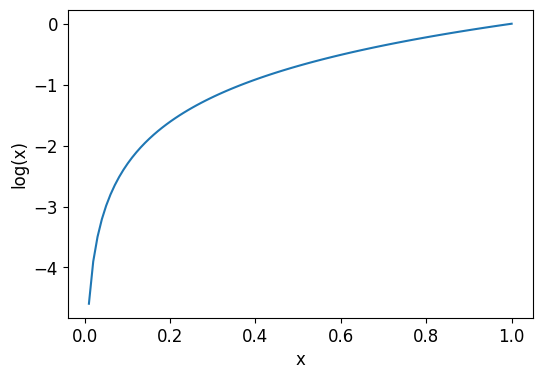

In [31]:
plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

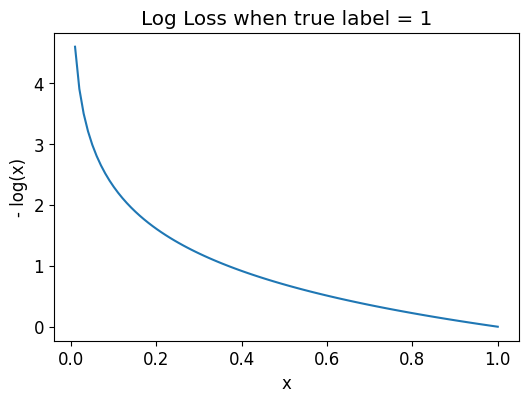

In [32]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [33]:
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

AttributeError: 'Styler' object has no attribute 'hide_index'

### Negative Log Likelihood

In [34]:
loss_func = nn.CrossEntropyLoss()

# Criando a loss function mais comum para problemas de classificação multi-classe: a Cross Entropy Loss
# Aplica o log_softmax() nos logits de entrada: Converte os logits brutos em log-probabilidades
# Calcula a Negative Log Likelihood Loss (NLL Loss): Faz o cálculo do -log(prob da classe correta)

In [35]:
loss_func(acts, targ)

tensor(1.8045)

In [36]:
F.cross_entropy(acts, targ)

# Aplica um softmax nos logits: faz com que cada com as probabilidades de cada calsse some 1.
# Aplica o log  na base e (≈ 2.71828) para cada valor. 
# Pega a log-probabilidade (calculada acima) da classe correta
# Calcula o negativo da média dessas log-probabilidades → Isso é a Cross-Entropy Loss.

tensor(1.8045)

In [37]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

# Mesmas etapa acima, mas não faz a média. 

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

## Model Interpretation

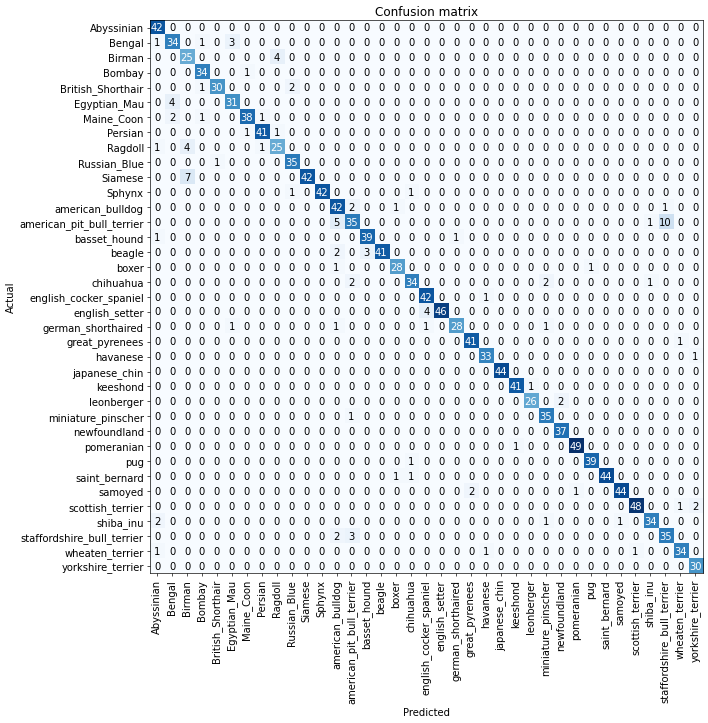

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Mostra dificuldade de interpreação de uma matriz com muitas classes

In [39]:
interp.most_confused(min_val=5)

# Identifica as predições vs. classe correta com maiores erros. 

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Siamese', 'Birman', 7),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

## Improving Our Model

### The Learning Rate Finder

In [40]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

# Aqui você criou um novo Learner com a ResNet34,
# Treinou por 1 época com um learning rate de 0.1,

epoch,train_loss,valid_loss,error_rate,time
0,2.570002,6.652011,0.599459,00:42


epoch,train_loss,valid_loss,error_rate,time
0,3.509245,2.306990,0.656969,00:48


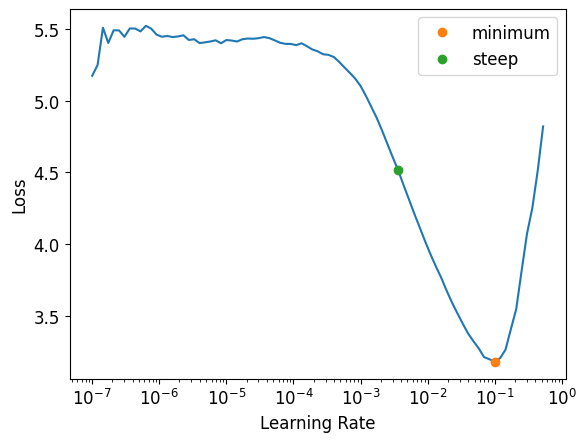

In [41]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

# lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
# Roda um mini-treino de poucos batches, testando vários learning rates diferentes, que vão crescendo de forma exponencial (de bem pequeno até grande),
# E mede a loss para cada learning rate,
# No final, plota um gráfico: Learning Rate vs Loss
# minimum: O learning rate onde a loss foi mínima durante o teste
# steep (recomendado): O learning rate onde a curva da loss teve a descida mais íngreme (ou seja, onde o gradiente da perda foi mais negativo)

In [42]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

# Mostrando os LRs

Minimum/10: 1.00e-02, steepest point: 3.63e-03


In [43]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

# Treinando com LR ideal (steepest)

epoch,train_loss,valid_loss,error_rate,time
0,1.312327,0.336499,0.115020,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.532825,0.318844,0.103518,00:48
1,0.329853,0.258306,0.075101,00:49


### Unfreezing and Transfer Learning

In [ ]:
learn.fine_tune??

In [44]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

# O que é o One Cycle Policy?
# É uma estratégia de ajuste de learning rate durante o treino:

#Ele faz o learning rate:

# Subir gradualmente nas primeiras etapas (warm-up),

# Depois cair lentamente,

# Eventualmente chegando a valores muito pequenos no final do ciclo.

# Por que?
# Melhora a convergência: Ajuda a sair de mínimos locais
# Evita overfitting: Ao reduzir o LR no final, faz o modelo "assentar"
# Reduz tempo de treino	Muitas vezes atinge bom desempenho em menos épocas

epoch,train_loss,valid_loss,error_rate,time
0,1.149334,0.369885,0.118403,00:41
1,0.544512,0.261799,0.085250,00:40
2,0.327939,0.238974,0.078484,00:40


In [45]:
learn.unfreeze()

# Antes: Apenas as últimas camadas (fully connected layers / head) estavam treináveis. Backbone (camadas convolucionais) estava congelado
# Agora: Todas as camadas da ResNet34 (incluindo as convolucionais pré-treinadas) ficam treináveis. Backbone agora pode ser ajustado (fine-tuning completo)

SuggestedLRs(valley=1.737800812406931e-05)

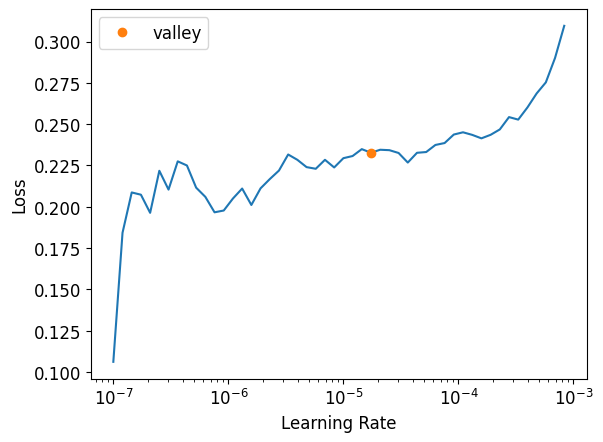

In [46]:
learn.lr_find()

# Roda o lr.finda pra saber qual learning rate usar nas camadas mais profundas.

# O "valley" (ou vale) é o ponto onde a perda (Loss) atinge o valor mais baixo antes de começar a subir de novo. É um ponto ideal entre ter a LR muito baixa (tempo longo de treinamento, overfitting) e perde muito a loss.
# A curva era ao contrário do modelo com pesos "virgens" (mais "burro"). Nesse caso, o modelo ja As camadas já estão com pesos bem razoáveis, sabe bastante coisa util, mesmo antes do fine tuning.
# Como a rede já está "boa", a loss começa baixa (porque os pesos já estão bem ajustados para visão em geral).
# Mas à medida que o learning rate aumenta, você começa a estragar os pesos (por updates muito agressivos),

In [47]:
learn.fit_one_cycle(6, lr_max=1e-5)

# Treino de todas as camadas com LR menor (adequado para camadas mais profundas)

epoch,train_loss,valid_loss,error_rate,time
0,0.258004,0.228795,0.076455,00:50
1,0.237221,0.222552,0.074425,00:49
2,0.216222,0.211859,0.068336,00:49
3,0.183791,0.204459,0.064276,00:49
4,0.182219,0.204309,0.066982,00:49
5,0.182952,0.207099,0.071042,00:49


### Discriminative Learning Rates

In [48]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

# learn = vision_learner(dls, resnet34, metrics=error_rate): Criou o learner
# learn.fit_one_cycle(3, 3e-3): Só a cabeça (últimas camadas) foi treinada primeiro
# learn.unfreeze(): Liberou todas as camadas para treino (inclusive as convolucionais pré-treinadas)
# it_one_cycle(12, lr_max=slice(1e-6,1e-4)): Fez fine-tuning completo com learning rates diferentes: Camadas iniciais com LR menor (1e-6), camadas finais com LR maior (1e-4)


epoch,train_loss,valid_loss,error_rate,time
0,1.142590,0.329698,0.111637,00:41
1,0.522320,0.256579,0.077131,00:39
2,0.307438,0.222822,0.072395,00:40


epoch,train_loss,valid_loss,error_rate,time
0,0.245822,0.216803,0.071042,00:49
1,0.254581,0.212842,0.067659,00:49
2,0.225691,0.207074,0.065629,00:49
3,0.200624,0.201749,0.065629,00:49
4,0.182041,0.203773,0.067659,00:49


KeyboardInterrupt: 

In [ ]:
learn.recorder.plot_loss()

# Gráfico de loss ao longo das épocas de treinamento. 
# Se a loss de treino cai mas a de validação piora, pode ser overfitting.
# Se a loss de treino está muito alta e não cai, pode ser LR errado ou problema nos dados.

### Selecting the Number of Epochs

### Deeper Architectures

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

# Agora você está começando a usar treinamento com precisão mista (mixed precision training, FP16), que é uma técnica muito usada pra acelerar o treinamento e gastar menos memória de GPU.

# vision_learner(dls, resnet50, metrics=error_rate)	Cria o Learner com ResNet50 (uma rede ainda maior que a ResNet34)

# .to_fp16()	Converte o modelo para usar FP16 (16 bits ao invés de 32 bits), economizando memória de GPU e acelerando o treinamento

# freeze_epochs=3	As primeiras 3 épocas só vão treinar o head da rede (últimas camadas), com o backbone congelado

## Conclusion

## Questionnaire

1. Why do we first resize to a large size on the CPU, and then to a smaller size on the GPU?
1. If you are not familiar with regular expressions, find a regular expression tutorial, and some problem sets, and complete them. Have a look on the book's website for suggestions.
1. What are the two ways in which data is most commonly provided, for most deep learning datasets?
1. Look up the documentation for `L` and try using a few of the new methods that it adds.
1. Look up the documentation for the Python `pathlib` module and try using a few methods of the `Path` class.
1. Give two examples of ways that image transformations can degrade the quality of the data.
1. What method does fastai provide to view the data in a `DataLoaders`?
1. What method does fastai provide to help you debug a `DataBlock`?
1. Should you hold off on training a model until you have thoroughly cleaned your data?
1. What are the two pieces that are combined into cross-entropy loss in PyTorch?
1. What are the two properties of activations that softmax ensures? Why is this important?
1. When might you want your activations to not have these two properties?
1. Calculate the `exp` and `softmax` columns of <<bear_softmax>> yourself (i.e., in a spreadsheet, with a calculator, or in a notebook).
1. Why can't we use `torch.where` to create a loss function for datasets where our label can have more than two categories?
1. What is the value of log(-2)? Why?
1. What are two good rules of thumb for picking a learning rate from the learning rate finder?
1. What two steps does the `fine_tune` method do?
1. In Jupyter Notebook, how do you get the source code for a method or function?
1. What are discriminative learning rates?
1. How is a Python `slice` object interpreted when passed as a learning rate to fastai?
1. Why is early stopping a poor choice when using 1cycle training?
1. What is the difference between `resnet50` and `resnet101`?
1. What does `to_fp16` do?

### Further Research

1. Find the paper by Leslie Smith that introduced the learning rate finder, and read it.
1. See if you can improve the accuracy of the classifier in this chapter. What's the best accuracy you can achieve? Look on the forums and the book's website to see what other students have achieved with this dataset, and how they did it.